<a href="https://colab.research.google.com/github/luizotaviopala/An-lise-e-visualiza-o-de-dados/blob/master/serie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ajuste de um modelo de séries temporais utlizando o GOOGLE COLAB**

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


**Vamos carregar o conjunto de dados que já está armazenado na nuvem, relativo a série temporal de janeiro de 2010 a 2019.**

In [3]:
df = pd.read_table('dados_furtos.txt')
df.head()


,data,Ano,Furtos
0,janeiro,2010,792
1,fevereiro,2010,730
2,marco,2010,876
3,abril,2010,634
4,maio,2010,806


**Estatísticas descritivas e comportamento gráfico da série temporal analisada. A média mensal de furtos foi de 755 carros, com mínimo de 538 e máximo de 1032.**


In [4]:
df.Furtos.describe() # algumas estatísticas descritivas da variável


count     115.000000
mean      745.330435
std       109.940233
min       538.000000
25%       656.000000
50%       730.000000
75%       833.500000
max      1032.000000
Name: Furtos, dtype: float64

**Declarando a variável Furtos como uma série temporal e carregando as bibliotecas para ajuste do modelo**

(0, 1100)

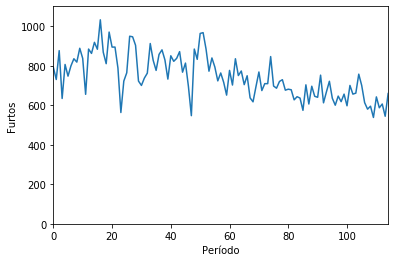

In [5]:
import statsmodels.formula.api as sm # biblioteca para ajuste de modelos

ts = pd.Series(df.Furtos) # declarando como uma série temporal
ts.plot()
plt.xlabel('Período'); plt.ylabel('Furtos'); plt.ylim(0, 1100)



**Analise da tendência ($T_{t}$) na série a partir de uma regressão na tendência**

In [0]:
trend = list(range(1, 115, 1))
trend
len(df.Furtos) # tamanho do vetor furtos


# criar o data frame
lista = list(zip(df.Furtos, trend, df.data))  
df1 = pd.DataFrame(lista, columns = ['Furtos', 'trend', 'data'])  
df1.head()

# conforme a regressão, a tendencia é significativa
result = sm.ols(formula="Furtos~ trend", data = df1).fit()
print(result.summary())

**Teste de tendência Augmented dickey fuller a série temporal**

In [0]:
from statsmodels.tsa.stattools import adfuller, kpss

result = adfuller(df1.Furtos)
#print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


**Teste KPSS para estacionariedade**

In [0]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df1.Furtos)

**Análise da sazonalidade $S_t$**

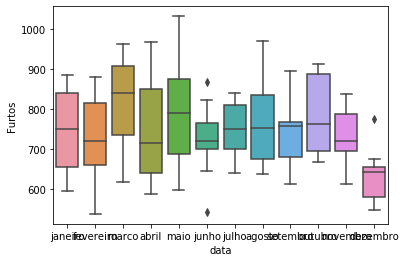

In [0]:
sns.boxplot(data=df1, x='data', y='Furtos')

**Vamos analisar a componente sazonal através da regressão linear com a inclusão de dummies sazonais. Note que há um efeito significativo do mês de dezembro na série temporal**

In [0]:
result = sm.ols(formula="Furtos~ data", data = df1).fit()
print(result.summary()) # efeito significativo de dezembro!!



**Removendo as componentes de tendência e sazonalidade da série**

In [0]:
# primeira diferença para tendencia
furtos_t = df.Furtos.diff(periods=1)
furtos_t.head(); len(furtos_t) # observe que a primeira fica com na

# primeira diferença sazonal
furtos_st = furtos_t.diff(periods = 12)
print(furtos_st)

# plot da série 
furtos_st.plot()


**Funções de autocorrelação da série estacionária**

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


# removendo os na's das diferenças
furtos_st = furtos_st.dropna()

%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(furtos_st, lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(furtos_st, lags=25, ax=ax2)

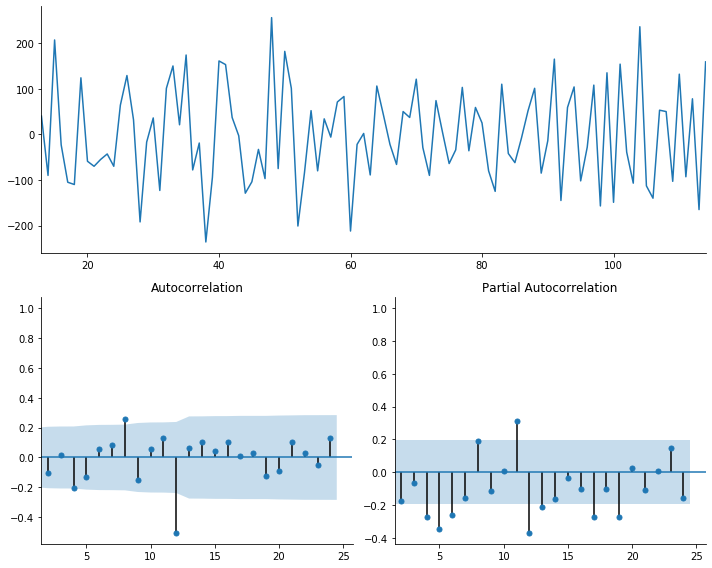

In [54]:
from pandas.plotting import autocorrelation_plot
import statsmodels.tsa.api as smt
import statsmodels.api as sm

#autocorrelation_plot(furtos_st)

def tsplot(y, lags=None, figsize=(10, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

tsplot(furtos_st, lags=24);

